# PCA - Embeddings

## Leggo il dataframe
Vengono scartate tutte le parole con un'occorrenza < 10

In [1]:
import pandas as pd
import numpy as np

TARGET_DATASET = 'TwReyes2013'
df = pd.read_pickle("../data/processed/{}.pca/out_matrix.pkl".format(TARGET_DATASET))
#df = df.astype(np.float32)
# Remove invalid tokens
df.drop(['[CLS]', '[SEP]', 'rt'], inplace=True)
# Remove unused columns
df.drop(['#+', '#-', 'coeff'], axis=1, inplace=True)
# Remove all words which occurrence is less than 10
df = df[df['#'] >= 10]
df.drop(['#'], axis=1, inplace=True)
df

,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,embedding_10,...,embedding_3063,embedding_3064,embedding_3065,embedding_3066,embedding_3067,embedding_3068,embedding_3069,embedding_3070,embedding_3071,embedding_3072
wow,-0.441677,0.490491,-0.256949,0.016495,0.026876,-0.202709,-0.437393,-0.709925,-0.465928,-0.391460,...,0.995763,0.899674,0.814723,-0.412755,0.577316,0.314938,0.963037,1.552084,1.464090,-0.776813
ill,-1.052411,0.675197,1.414462,0.075330,-2.168924,-0.176111,1.486864,0.011904,0.251693,-1.408495,...,2.090130,-1.224415,0.573793,-0.524464,-0.795635,1.015412,1.733982,-1.006333,0.056809,1.173511
say,-0.712049,1.052176,0.567904,1.673244,-1.148640,1.048462,-0.229531,1.497914,0.503576,0.093757,...,-0.146024,-0.672621,0.863001,0.394411,-1.387510,1.715413,-0.725505,-0.552992,0.588629,-0.069043
more,-0.544684,-0.603130,-1.830505,0.971808,-1.253382,-0.312086,0.336008,1.098267,-1.681295,-1.304050,...,1.919081,-1.058124,-0.157646,0.572707,0.164734,-0.133899,1.316660,-0.126004,2.024207,0.153106
than,-1.095580,-0.279387,-0.613873,2.192099,-1.670404,-0.811046,1.214624,0.104546,-0.319398,0.080956,...,0.095297,-0.535060,-1.189421,1.709288,-0.051492,0.783269,0.526661,0.424909,-0.709901,2.184991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trillion,2.239318,-1.424288,0.291247,-2.339836,0.029543,0.066847,-0.104556,-0.394499,-0.177846,-0.751000,...,-0.378499,0.463196,0.789970,0.589468,-0.265890,0.877811,0.917083,0.502615,0.883471,1.992920
unconstitutional,0.302203,0.677010,-0.246328,-1.254266,0.022123,-1.039637,0.365335,-0.213976,-1.809472,-0.085971,...,0.537839,0.208037,-0.311258,-0.336180,0.722678,0.227362,0.947261,0.396785,-0.973623,0.390455
dodd,0.494387,-0.630184,0.865309,0.402908,-0.857776,-0.907820,-0.188027,1.218578,0.321040,-0.455612,...,1.065490,0.275101,0.584546,-0.675387,0.744045,0.284403,-0.267395,1.282597,-1.298261,0.196221
obstruction,-0.392703,-0.218207,-0.203197,-0.955218,-0.396999,0.474855,0.136008,1.513992,-1.110438,-0.870319,...,0.402000,-0.390246,1.115225,1.744206,0.418963,0.605983,-0.035986,0.481081,-1.452203,0.305082


## Standardizzazione del dataset

In [2]:
from sklearn.preprocessing import StandardScaler

matrix = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)
matrix

,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,embedding_10,...,embedding_3063,embedding_3064,embedding_3065,embedding_3066,embedding_3067,embedding_3068,embedding_3069,embedding_3070,embedding_3071,embedding_3072
wow,-0.376243,0.551474,-0.396656,-0.008736,0.075464,-0.223470,-0.506835,-0.759706,-0.492508,-0.368644,...,0.974124,0.892914,0.809317,-0.387515,0.575355,0.230318,0.978579,1.687795,1.527232,-0.804264
ill,-1.008627,0.741065,1.356759,0.050742,-2.148954,-0.195072,1.571678,-0.027719,0.259982,-1.465708,...,2.157547,-1.376470,0.556909,-0.503570,-0.871174,0.985236,1.796223,-1.094670,0.045371,1.147472
say,-0.656199,1.128016,0.468667,1.666136,-1.115373,1.112419,-0.282309,1.479200,0.524103,0.154754,...,-0.260579,-0.786932,0.859894,0.451054,-1.494768,1.739642,-0.812245,-0.601628,0.605375,-0.095982
more,-0.482901,-0.571077,-2.047415,0.957027,-1.221480,-0.340253,0.328565,1.073930,-1.766926,-1.353044,...,1.972579,-1.198804,-0.209377,0.636286,0.140662,-0.253404,1.353621,-0.137248,2.117032,0.126328
than,-1.053326,-0.238770,-0.771092,2.190666,-1.643937,-0.872999,1.277614,0.066226,-0.338857,0.140946,...,0.000381,-0.639961,-1.290307,1.817085,-0.087152,0.735049,0.515770,0.461910,-0.761970,2.159683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trillion,2.399789,-1.413957,0.178436,-2.390842,0.078166,0.064338,-0.147316,-0.439841,-0.190428,-0.756475,...,-0.511972,0.426580,0.783384,0.653699,-0.313039,0.836939,0.929841,0.546421,0.915842,1.967473
unconstitutional,0.394007,0.742926,-0.385513,-1.293397,0.070649,-1.117069,0.360243,-0.256778,-1.901331,-0.039116,...,0.478935,0.153966,-0.370308,-0.307962,0.728507,0.135936,0.961847,0.431323,-1.039669,0.363848
dodd,0.593003,-0.598847,0.780663,0.381904,-0.820718,-0.976326,-0.237478,1.195934,0.332698,-0.437843,...,1.049525,0.225618,0.568174,-0.660365,0.751018,0.197410,-0.326386,1.394708,-1.381511,0.169474
obstruction,-0.325533,-0.175971,-0.340266,-0.991079,-0.353935,0.499973,0.112533,1.495504,-1.168333,-0.885183,...,0.332042,-0.485241,1.124136,1.853361,0.408515,0.543985,-0.080960,0.523001,-1.543611,0.278414


## Calcolo la matrice trasposta

In [3]:
# Transpose the matrix
matrix_t = df.transpose()
matrix_t

,wow,ill,say,more,than,irony,de,om,there,are,...,ruling,robe,affirmative,borrowing,hamas,trillion,unconstitutional,dodd,obstruction,medications
embedding_1,-0.441677,-1.052411,-0.712049,-0.544684,-1.095580,0.312027,-2.071060,0.803452,-2.723064,0.111967,...,-0.188692,1.116545,-0.636395,0.051237,-0.147023,2.239318,0.302203,0.494387,-0.392703,-0.614568
embedding_2,0.490491,0.675197,1.052176,-0.603130,-0.279387,1.358382,-0.347860,0.422496,-0.440059,-0.043229,...,-0.244355,0.786994,-1.461889,-0.241622,-2.121832,-1.424288,0.677010,-0.630184,-0.218207,-0.035509
embedding_3,-0.256949,1.414462,0.567904,-1.830505,-0.613873,0.029122,0.987115,-1.188144,0.156788,-1.154775,...,-0.692879,0.589664,-0.640799,-0.347998,-1.273287,0.291247,-0.246328,0.865309,-0.203197,0.061470
embedding_4,0.016495,0.075330,1.673244,0.971808,2.192099,1.444951,0.506296,-0.548344,1.570678,0.297050,...,-0.611240,-0.082204,-0.927048,0.776076,-0.935884,-2.339836,-1.254266,0.402908,-0.955218,-0.089953
embedding_5,0.026876,-2.168924,-1.148640,-1.253382,-1.670404,-0.173793,0.234569,-0.181982,0.264284,-0.570511,...,-0.725015,-1.124326,-0.435950,-0.903008,-0.146874,0.029543,0.022123,-0.857776,-0.396999,1.481434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
embedding_3068,0.314938,1.015412,1.715413,-0.133899,0.783269,-0.312776,0.450901,1.048899,-0.564269,-0.122385,...,-1.537484,0.241763,-0.370066,-0.028193,0.315958,0.877811,0.227362,0.284403,0.605983,0.434566
embedding_3069,0.963037,1.733982,-0.725505,1.316660,0.526661,0.557680,0.921286,0.346414,1.325677,0.913864,...,0.606852,0.797714,0.995889,-0.216261,-0.539669,0.917083,0.947261,-0.267395,-0.035986,0.175944
embedding_3070,1.552084,-1.006333,-0.552992,-0.126004,0.424909,-0.232033,-0.544789,0.413310,-1.827447,-0.274590,...,0.242473,0.774815,0.441132,1.153797,-0.781580,0.502615,0.396785,1.282597,0.481081,0.665137
embedding_3071,1.464090,0.056809,0.588629,2.024207,-0.709901,1.143680,0.212149,1.652066,0.322759,1.056444,...,-0.243045,0.305431,-2.344705,0.289433,-0.567053,0.883471,-0.973623,-1.298261,-1.452203,-1.052324


## PCA
https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad

In [4]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(matrix_t)
len(pca.components_)

3072

In [5]:
pca.explained_variance_

array([1.82064016e+02, 1.43586911e+02, 9.72636548e+01, ...,
       2.76406711e-14, 2.49783593e-14, 3.59057962e-29])

### Autovettori associati agli autovalori

Viene calcolato il contributo di ogni componente principale considerando i vari autovalori

In [6]:
import math

explained_variance = pca.explained_variance_ / sum(pca.explained_variance_)
# The overall explained variance must be 1
assert math.isclose(sum(explained_variance), 1)
# The eigenvalues are alredy sorted
assert np.all(explained_variance == sorted(explained_variance, reverse=True))

### Plot della varianza spiegata usando k componenti

In [7]:
import matplotlib.pyplot as plt 

FONTSIZE = 12
X_DIM = 18
Y_DIM = 14
plt.rc('font', size=FONTSIZE)          # controls default text sizes

def top_k_dimensions(explained_variance, k):
    return explained_variance[:k], np.cumsum(explained_variance)[:k]

def plot_dimensions(top_k, cum_sum):
    def plot_bar(i):
        plt.figure(figsize=(Y_DIM, X_DIM))
        plt.subplot(2, 1, i)
        plt.bar(range(1, len(top_k) + 1), top_k, alpha=0.5,
                align='center', label='individual explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal component')
        plt.xticks()
        plt.xticks(range(1, len(top_k) + 1), range(1, len(top_k) + 1), rotation='vertical')
        plt.legend(loc='best')
    
    # First subplot
    plot_bar(1)
    plt.step(range(1, len(top_k) + 1), cum_sum, where='mid', label='cumulative explained variance')
    plt.legend(loc='best')
    plt.show()
    # Second subplot
    plot_bar(2)
    plt.show()

## 10 Componenti

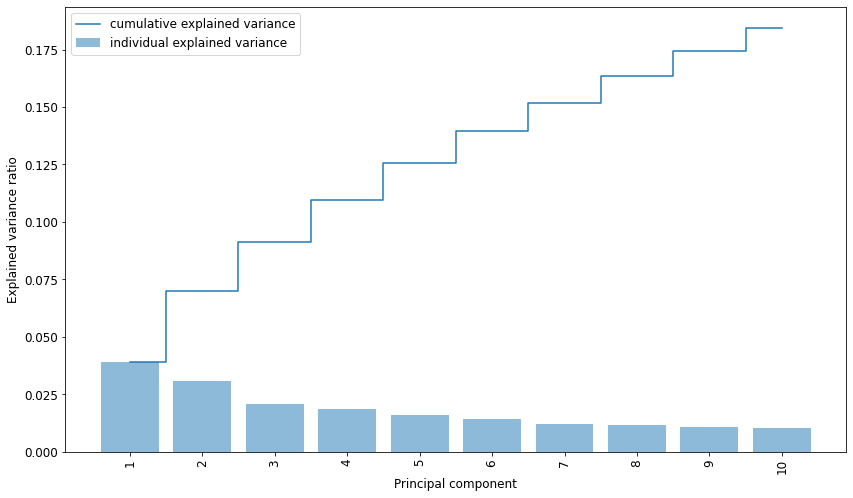

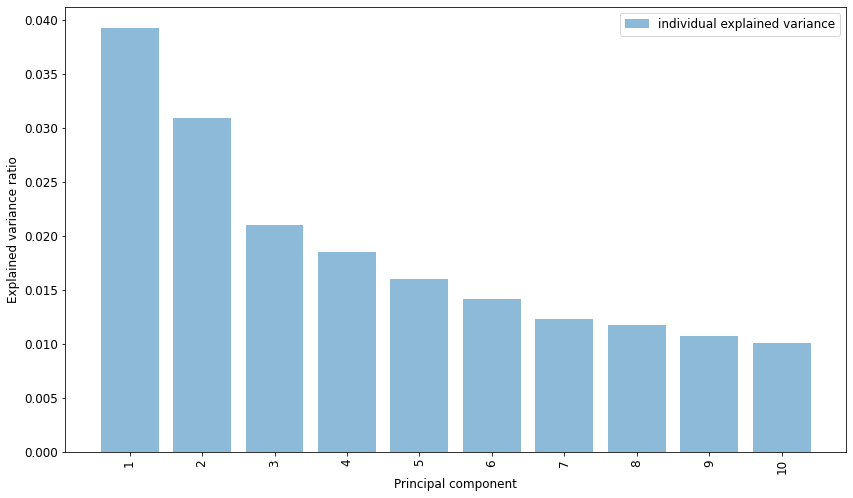

In [8]:
k = 10

top_k, cum_sum = top_k_dimensions(explained_variance, k)
plot_dimensions(top_k, cum_sum)

## 50 Componenti

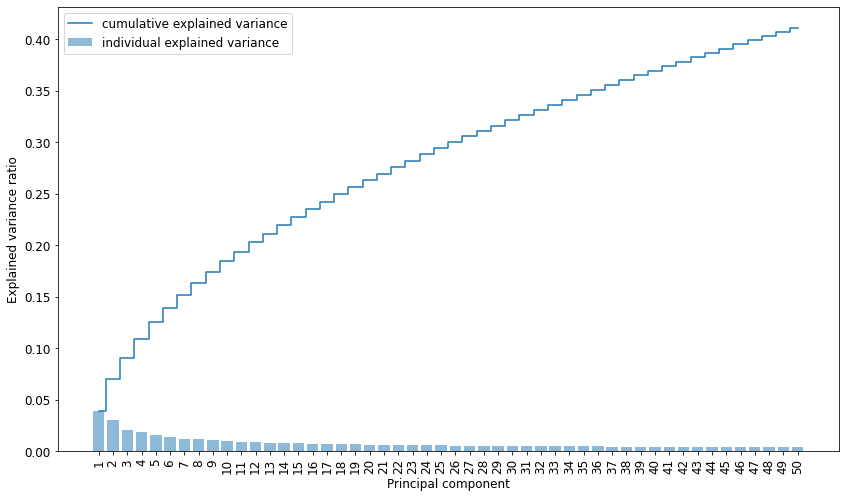

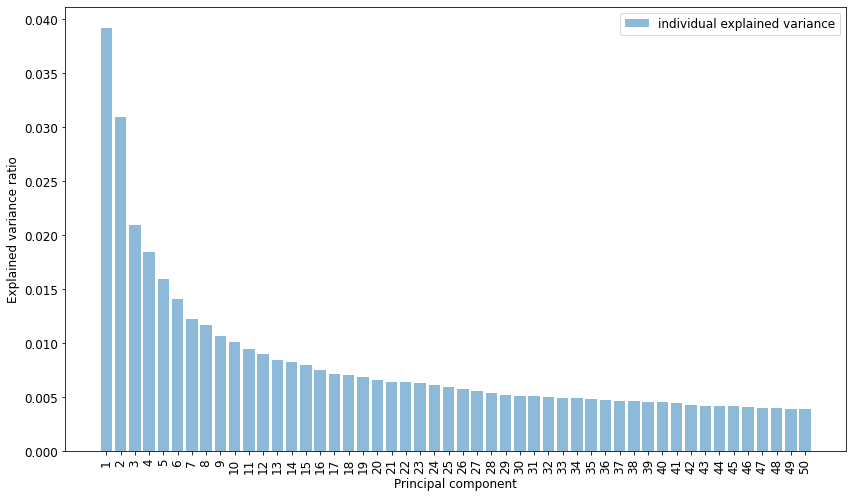

In [9]:
k = 50

top_k, cum_sum = top_k_dimensions(explained_variance, k)
plot_dimensions(top_k, cum_sum)

## Calcolo contributo di ogni variabile
Avendo la matrice composta da n autovettori sulle colonne, calcolo la sommatoria delle colonne
> The importance of each feature is reflected by the magnitude of the corresponding values in the eigenvectors (higher magnitude — higher importance).

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e

`fviz_contrib(res.pca, choice = "var", axes = 1:8, top = 50)`

In [10]:
components = pca.components_

abs_components = np.sum(abs(components), axis=0)

contribution = abs_components / sum(abs_components)
contribution = list(zip(contribution, df.index))
contribution[:5]

[(0.00018755119228880653, 'wow'),
 (0.00020192346941106613, 'ill'),
 (0.0002083355826984581, 'say'),
 (0.00019951274009111025, 'more'),
 (0.00022231540513352422, 'than')]

### Ordino in base al contributo

In [11]:
contribution_sorted = sorted(contribution, key=lambda x: x[0], reverse=True)
contribution_sorted[:5]

[(0.00022795775762217332, 'dec'),
 (0.0002265356390459983, 'labeled'),
 (0.00022562814219506764, 'isla'),
 (0.0002249799769120878, 'treating'),
 (0.0002247049521543666, 'hundred')]

## Plot k feature che più contribuiscono relativamente alle componenti principali

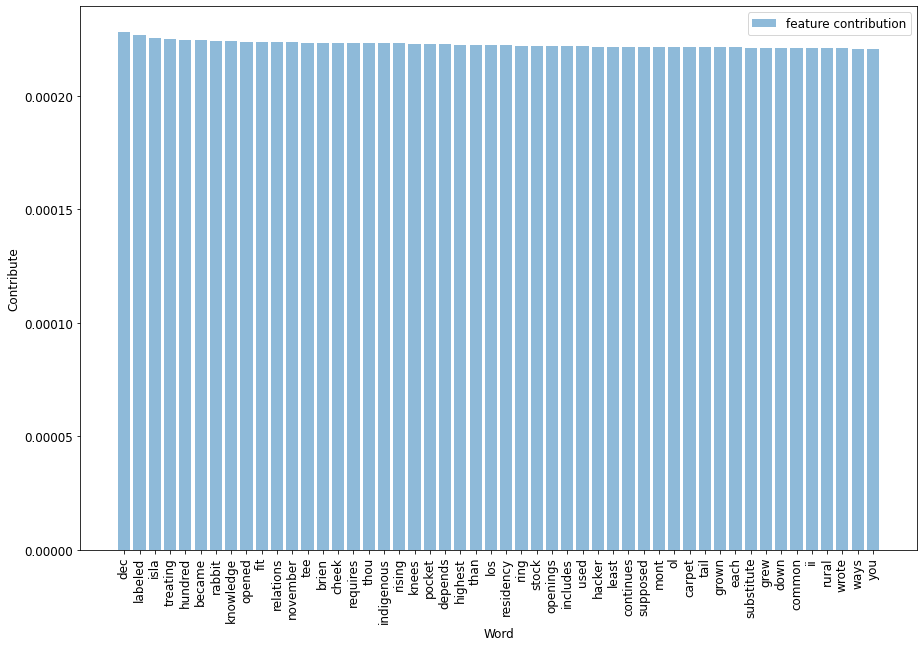

In [12]:
K = 50

top_contribution_sorted = contribution_sorted[:K]

Y_DIM = 10
X_DIM = 15

values = np.array([x for x, _ in top_contribution_sorted])
words = [x for _, x in top_contribution_sorted]

plt.figure(figsize=(X_DIM, Y_DIM))
plt.subplot(1, 1, 1)
plt.bar(range(1, K + 1), values, alpha=0.5, label='feature contribution', align='center')
plt.ylabel('Contribute')
plt.xlabel('Word')
plt.xticks(range(1, K+1), words, rotation='vertical')
plt.legend(loc='best')
plt.show()